# Data Mining - Project
## Profilling Notebook
## Group Members
|Name|StudentID|
|:-----------:|:--------:|
|Fabio Lopes|20200597|
|Filipe Costa|20201041|
|Jorge Pereira|20201085|


In [2]:
import sys
#!{sys.executable} -m pip install pyshp

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import shapefile as shp

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
pd.set_option('display.max_columns', None)

In [7]:
df_source = pd.read_csv('./data/donors.csv')
df_source.drop('Unnamed: 0', axis = 1, inplace = True)
df_fullLabeled = pd.read_csv('./Outputs/clustering_Labelled.csv',index_col=0)
df_tsne = pd.read_csv('./Outputs/clustering_tsne.csv',index_col=0)
df_prepped = pd.read_csv('./Outputs/dataprep_final.csv',index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
print(df_source.shape[0])
print(df_fullLabeled.shape[0])
print(df_tsne.shape[0])
print(df_prepped.shape[0])

95412
95412
95412
95412


In [9]:
def splitNumericAndCategorical(df):
    """Informs user on the total number of columns in the dataframe and splits it
       in 2 dataframes, one numerical and the other categorical."""
    df_num = df._get_numeric_data()
    df_cat = df.drop(df_num.columns, axis = 1)
    print(f"Total Columns: {df.shape[1]}")
    print(f"Numerical Columns: {df_num.shape[1]}")
    print(f"Categorical Columns: {df_cat.shape[1]}")
    return df_num,df_cat

# Cluster Profilling

In [10]:
df_prepped_labelled = df_prepped.copy()
df_prepped_labelled['Cluster'] = df_fullLabeled['Cluster']
df_profilling = df_prepped_labelled.copy()

In [11]:
# df_profilling = df_fullLabeled.copy()

In [12]:
df_fullLabeled.head()

,STATE,INCOME,WEALTH1,WWIIVETS,FEDGOV,WEALTH2,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,RFA_2F,elapsed_MINRDATE,elapsed_MAXRDATE,elapsed_LASTDATE,LASTGIFTAMOUNTCATEGORY,Cluster
0,IL,-0.266667,0.200000,-0.636364,-0.977011,0.111111,-0.133333,-0.368421,-0.662338,-0.745763,1.000000,-0.584386,-0.718758,0.217639,-0.333333,2
1,CA,0.666667,1.000000,-0.777778,-0.977011,1.000000,-0.633333,-0.368421,-0.688312,-0.983051,-0.333333,-0.692016,-0.890172,0.217639,1.000000,3
2,NC,-0.333333,-0.777778,-0.333333,-0.977011,-0.777778,-0.166667,-0.368421,-0.662338,-0.779661,1.000000,-0.515159,-0.569926,0.217639,-0.333333,2
3,CA,-1.000000,-0.111111,-0.373737,-0.931034,-1.000000,-0.133333,-0.368421,-0.662338,-0.872881,1.000000,-0.146033,-0.788812,0.217639,-0.333333,2
4,FL,-0.333333,-0.555556,0.070707,-0.954023,0.466667,0.400000,0.052632,-0.376623,-0.694915,-0.333333,-0.692016,-0.898127,0.129445,0.333333,0


In [13]:
df_profilling.head()

,STATE,ZIP,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,HOMEOWNR,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,VETERANS,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,RFA_2F,AGE,elapsed_MAXADATE,elapsed_MINRDATE,elapsed_MAXRDATE,elapsed_LASTDATE,elapsed_FISTDATE,elapsed_NEXTDATE,URBANICITY,SOCIOECON,LASTGIFTAMOUNTCATEGORY,MDONOR_GIVING_RECENCY,MDONOR_GIVING_FREQUENCY,MDONOR_GIVING_AMOUNT,Cluster
0,IL,61081,0,1,0,0,0,0,1,NaN,NaN,1,NaN,0,0,0,39,34,18,10,2,1,12,12,0,5.0,0,1,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4.0,7.741935,4,63.0,1429,3074,2525,1857,4078.0,3958.0,2,3,5,0,0,0,2
1,CA,91326,0,1,0,0,0,0,0,1.0,6.0,2,9.0,16,3,0,15,55,11,6,2,1,12,12,0,9.0,2,1,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18.0,15.666667,2,48.0,1429,2648,1857,1857,2648.0,2101.0,3,1,7,0,0,0,3
2,NC,27017,0,1,0,0,0,0,1,NaN,3.0,2,1.0,2,3,0,20,29,33,6,8,1,12,12,0,1.0,0,1,1,7001,2040

## Donors per Cluster

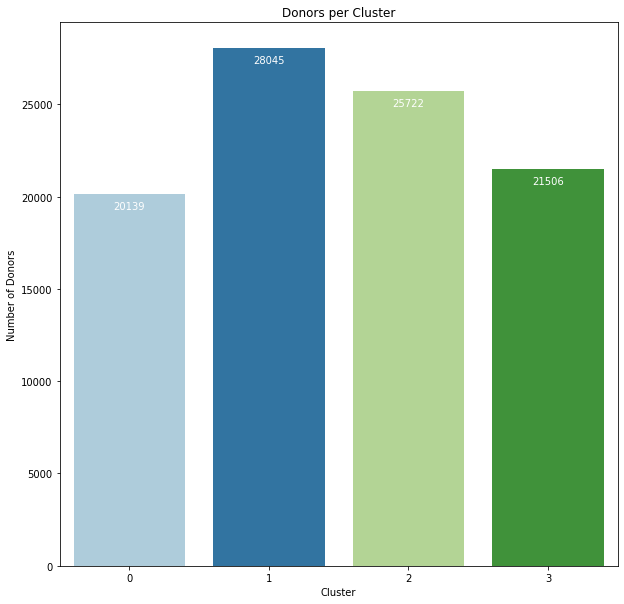

In [14]:
fig = plt.figure(figsize=(10, 10))
graph = sns.countplot(x="Cluster", data=df_profilling, palette = sns.color_palette("Paired"))

graph.set_xlabel("Cluster")
graph.set_ylabel("Number of Donors")
graph.set_title("Donors per Cluster")

# place the value of each category in it's respective bar
for bar in graph.patches:
    graph.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12),
                   color="white",
                   textcoords = 'offset points')

## State distribution

In [15]:
# https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

In [16]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [17]:
statecode = pd.read_csv('US_Name2Code.txt')
df_states = df_profilling.merge(statecode,left_on='STATE', right_on='Code',how='inner')
MedianClusterPerState = np.floor(df_states[['Name','Cluster']].groupby('Name').Cluster.median())
avgClusterPerState = np.ceil(df_states[['Name','Cluster']].groupby('Name').Cluster.mean())
ModeClusterPerState = df_states[['Name','Cluster']].groupby('Name').Cluster.agg(lambda x:x.value_counts().index[0])
colors = sns.color_palette("Paired").as_hex()[0 : df_states['Cluster'].nunique() ]

<Figure size 1080x648 with 0 Axes>

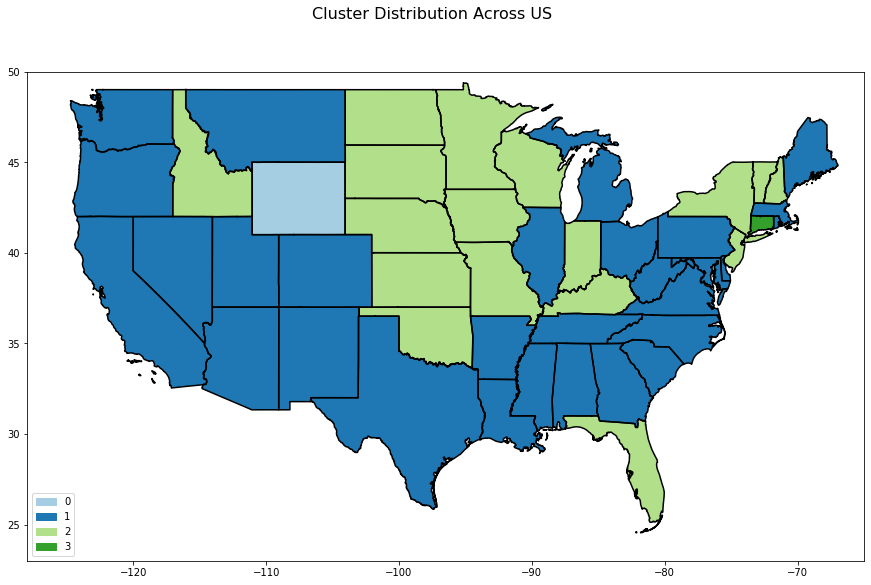

In [18]:
figsize = (15,9)
title = 'Cluster Distribution Across US'
y_lim = (23, 50)
x_lim = (-128, -65)

shp_path = "./US-ShapeFile/st99_d00.shp"
sf = shp.Reader(shp_path)
df_shape = read_shapefile(sf)
plt.figure(figsize = figsize)
fig, ax = plt.subplots(figsize = figsize)
fig.suptitle(title, fontsize=16)

for shape in sf.shapeRecords():
        for i in range(len(shape.shape.parts)):
            i_start = shape.shape.parts[i]
            if i==len(shape.shape.parts)-1:
                i_end = len(shape.shape.points)
            else:
                i_end = shape.shape.parts[i+1]
            x = [i[0] for i in shape.shape.points[i_start:i_end]]
            y = [i[1] for i in shape.shape.points[i_start:i_end]]
            plt.plot(x, y, 'k')
            
plt.xlim(x_lim)
plt.ylim(y_lim)
    
for State in df_states.Name.unique():
    Shapes = list(df_shape[df_shape['NAME'] == State].index)
    for Shape in Shapes:
        shape_ex = sf.shape(Shape)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, colors[int(ModeClusterPerState.loc[State])])

legends = [mpatches.Patch(color=c, label=f'{i}') for i,c in enumerate(colors)]
plt.legend(handles=legends)

In [19]:
df_profilling.head()

,STATE,ZIP,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,HOMEOWNR,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,VETERANS,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,RFA_2F,AGE,elapsed_MAXADATE,elapsed_MINRDATE,elapsed_MAXRDATE,elapsed_LASTDATE,elapsed_FISTDATE,elapsed_NEXTDATE,URBANICITY,SOCIOECON,LASTGIFTAMOUNTCATEGORY,MDONOR_GIVING_RECENCY,MDONOR_GIVING_FREQUENCY,MDONOR_GIVING_AMOUNT,Cluster
0,IL,61081,0,1,0,0,0,0,1,NaN,NaN,1,NaN,0,0,0,39,34,18,10,2,1,12,12,0,5.0,0,1,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4.0,7.741935,4,63.0,1429,3074,2525,1857,4078.0,3958.0,2,3,5,0,0,0,2
1,CA,91326,0,1,0,0,0,0,0,1.0,6.0,2,9.0,16,3,0,15,55,11,6,2,1,12,12,0,9.0,2,1,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18.0,15.666667,2,48.0,1429,2648,1857,1857,2648.0,2101.0,3,1,7,0,0,0,3
2,NC,27017,0,1,0,0,0,0,1,NaN,3.0,2,1.0,2,3,0,20,29,33,6,8,1,12,12,0,1.0,0,1,1,7001,2040

# Cluster Count for Binary variables

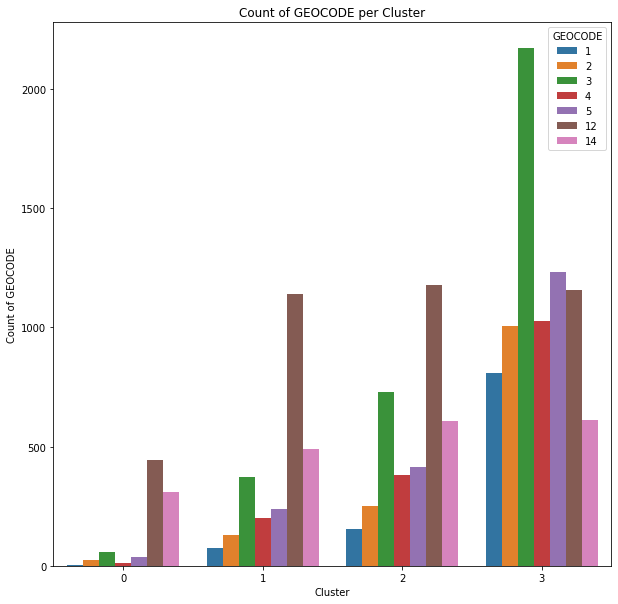

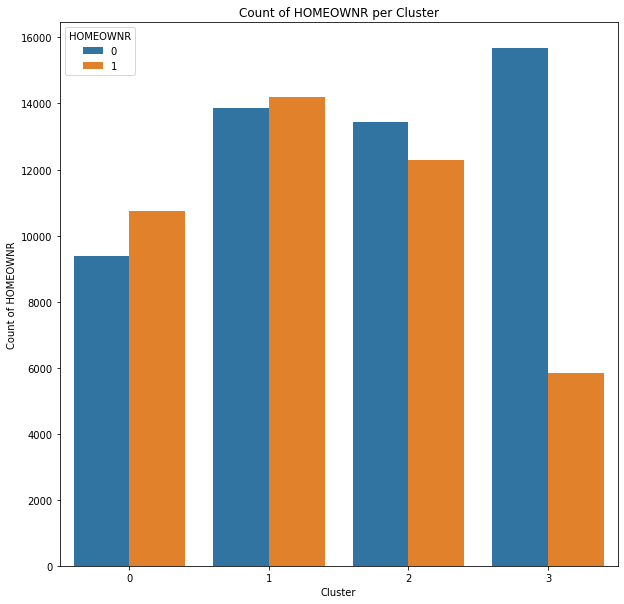

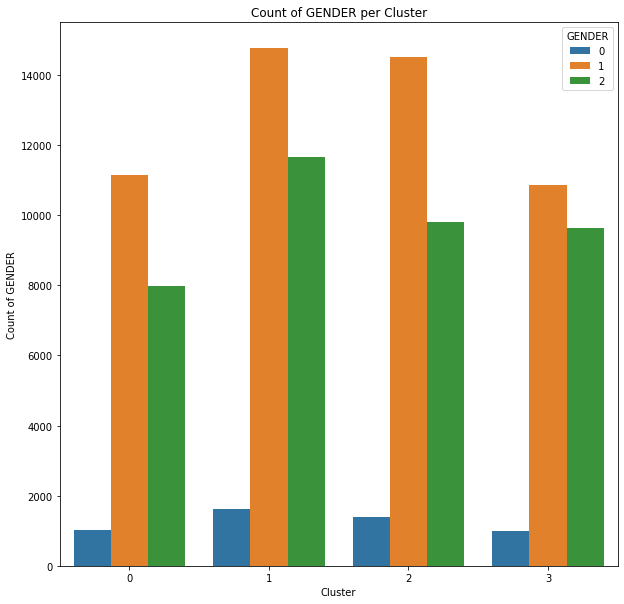

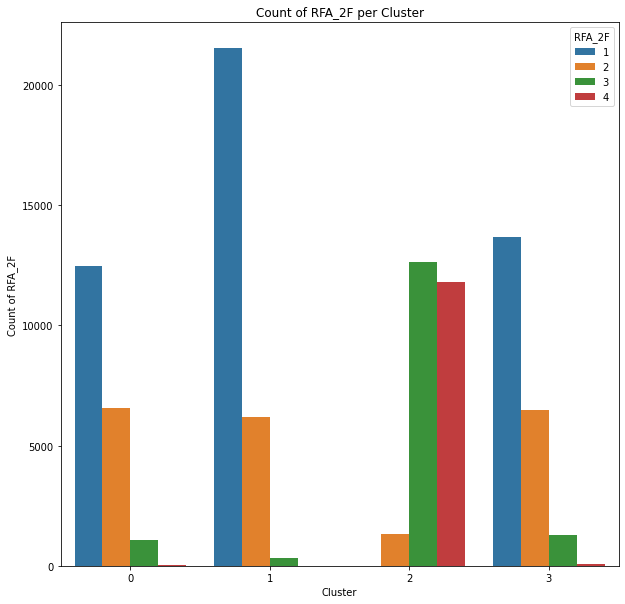

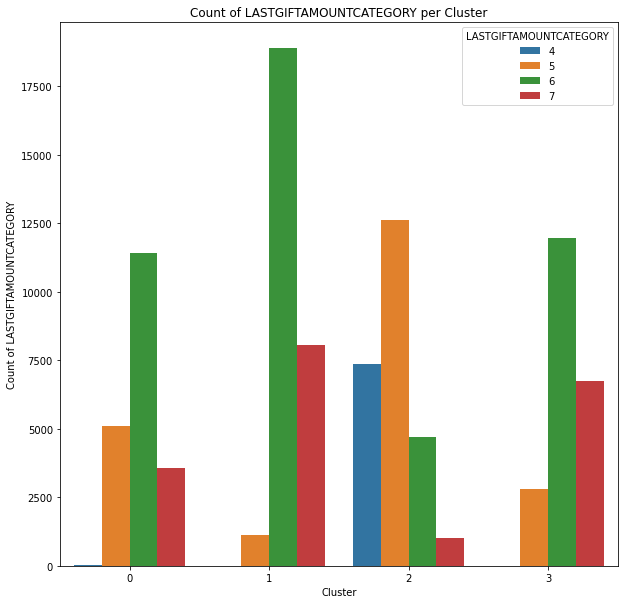

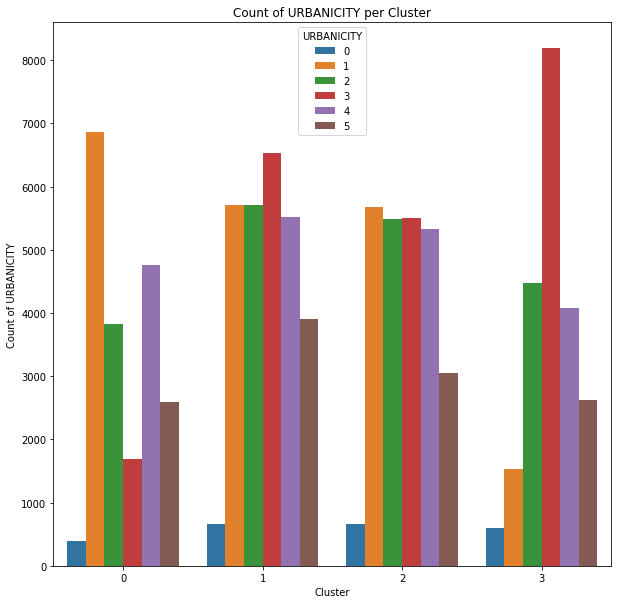

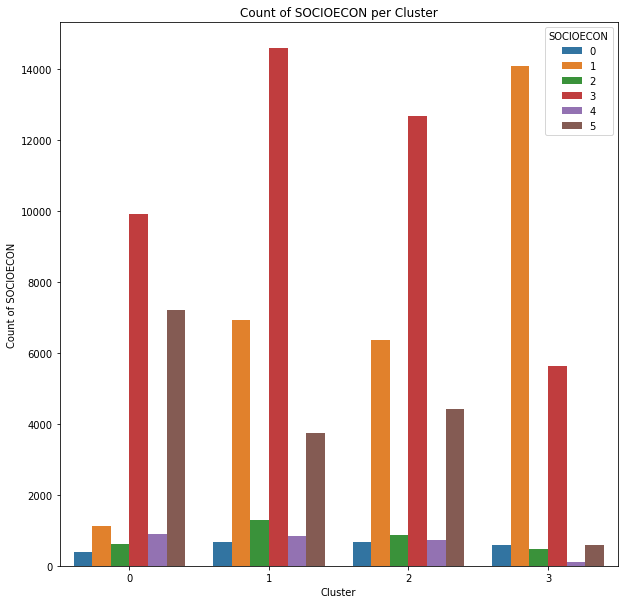

In [20]:
Binvariables = [ 'GEOCODE','HOMEOWNR','GENDER','RFA_2F','LASTGIFTAMOUNTCATEGORY','URBANICITY','SOCIOECON' ]

for i, var in enumerate(Binvariables):
    fig = plt.figure(figsize=(10, 10))
    if var == 'GEOCODE':
        graph = sns.countplot(x='Cluster', hue=var, data=df_profilling[df_profilling[var] != 0])
    else:
        graph = sns.countplot(x='Cluster', hue=var, data=df_profilling)
    graph.set_xlabel("Cluster")
    graph.set_ylabel(f"Count of {var}")
    graph.set_title(f"Count of {var} per Cluster")

# Cluster Averages for Continuous variables

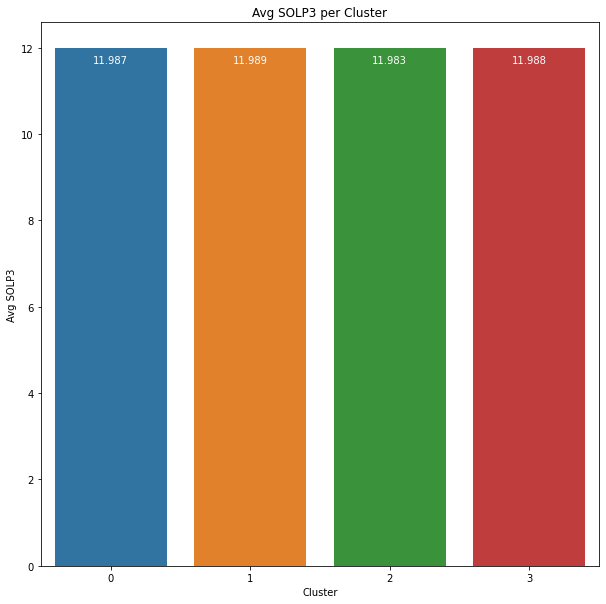

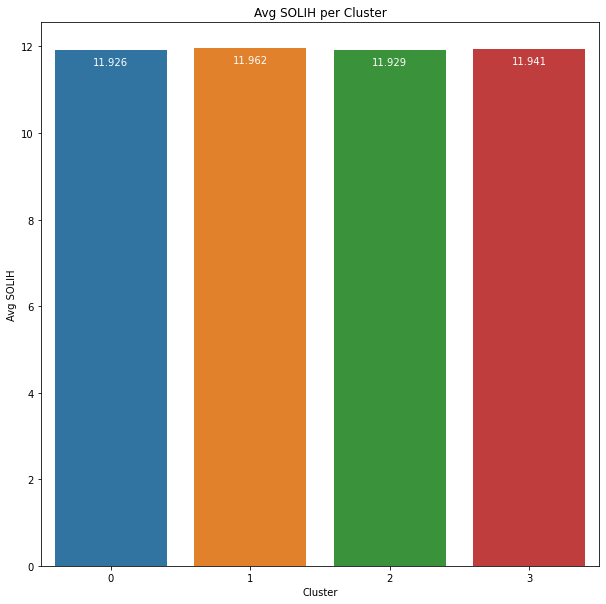

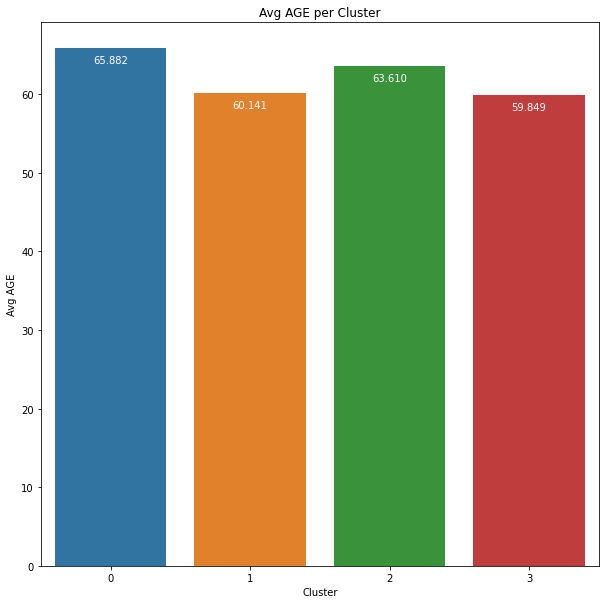

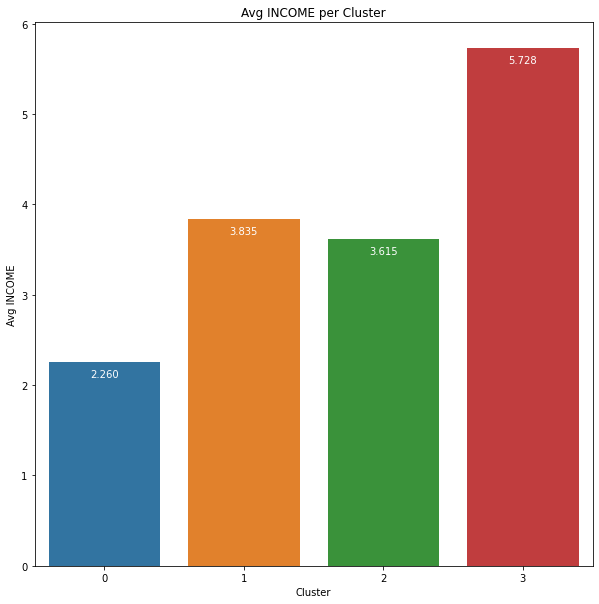

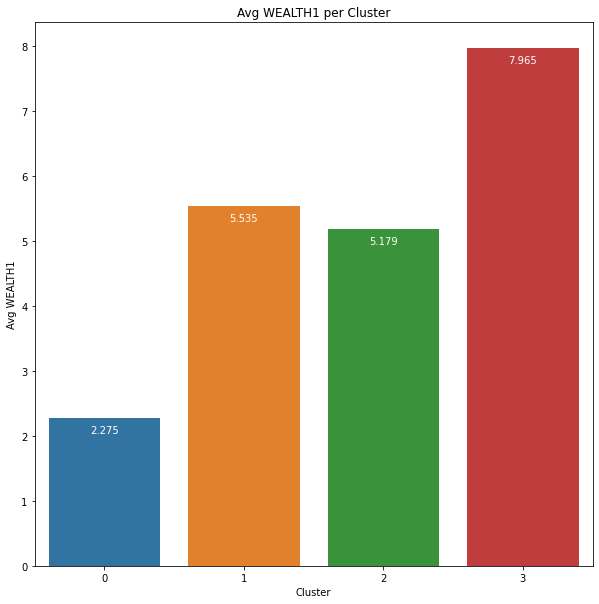

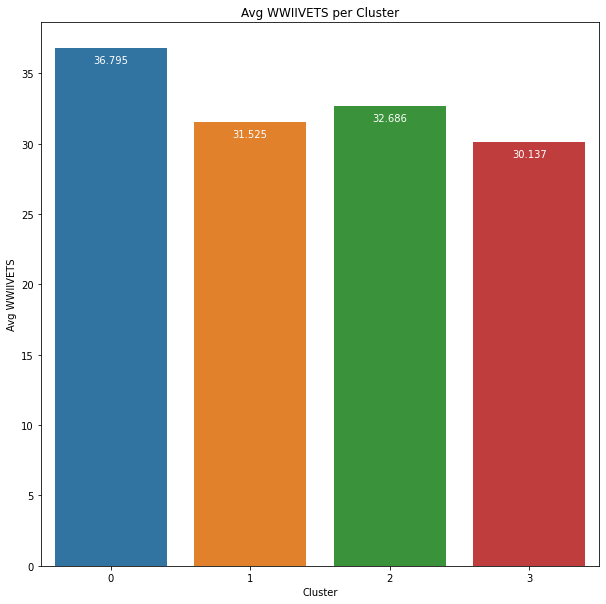

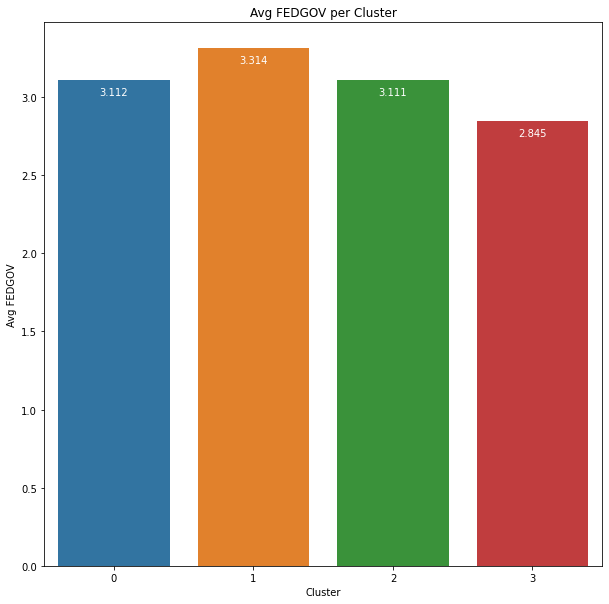

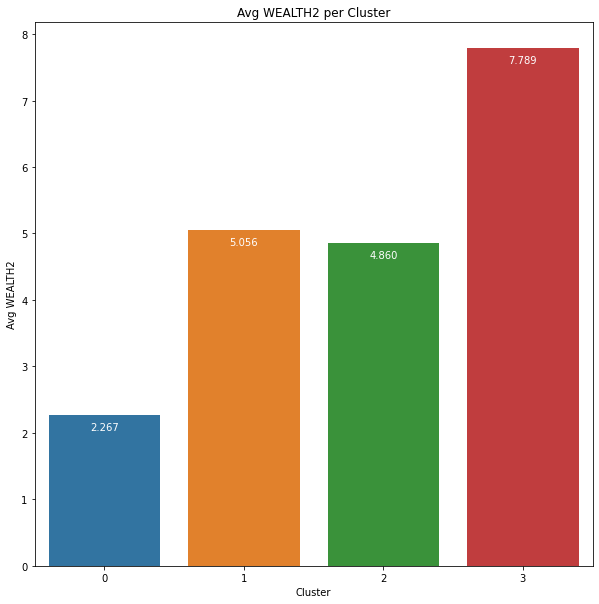

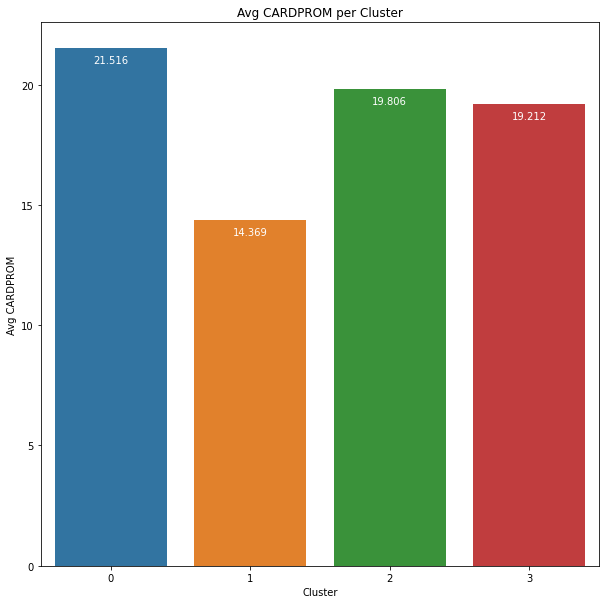

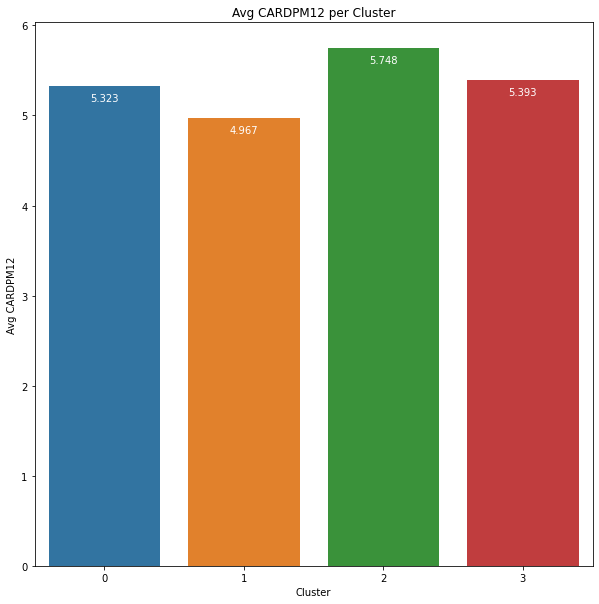

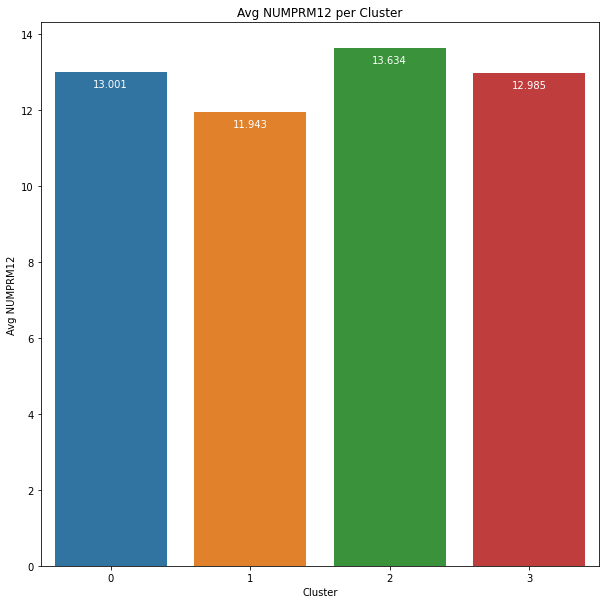

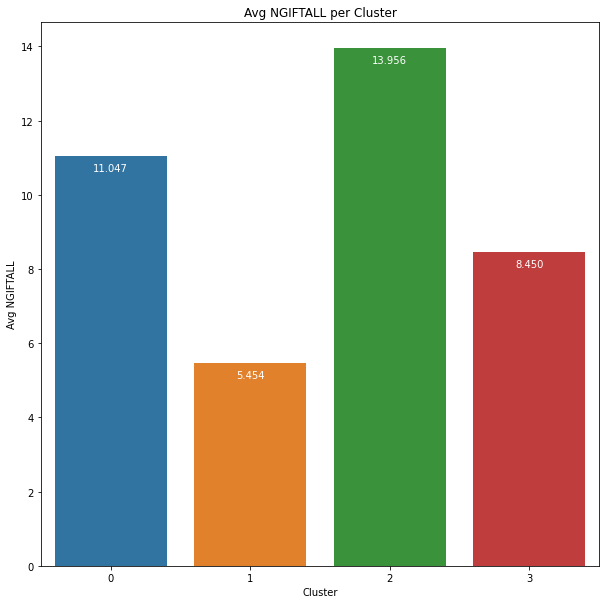

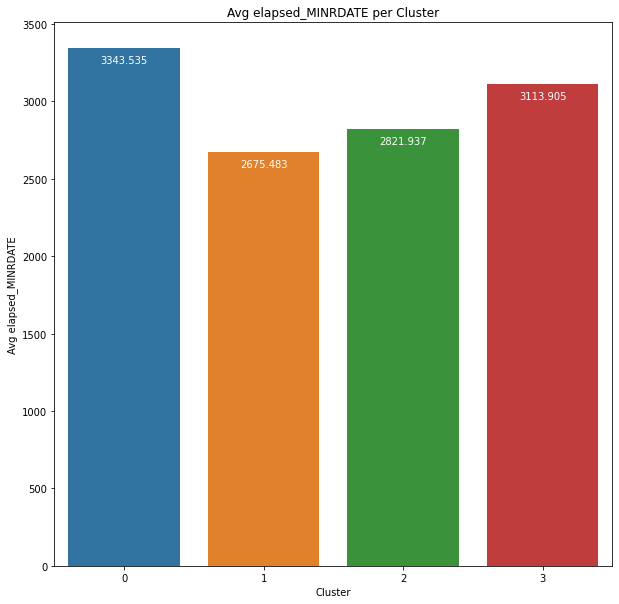

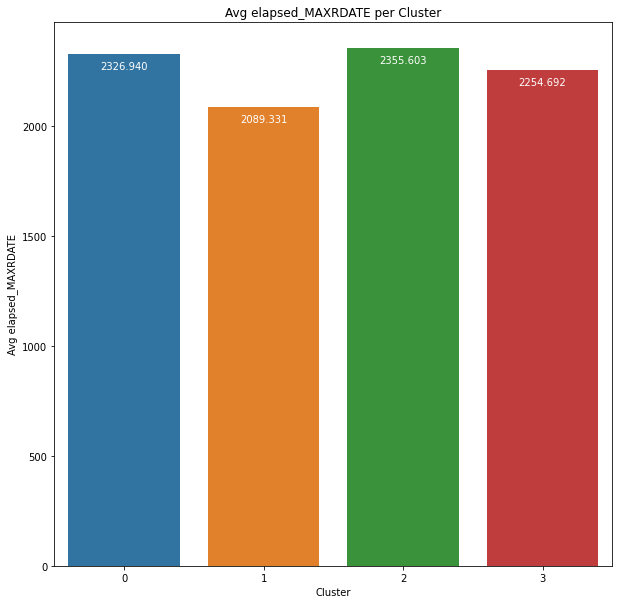

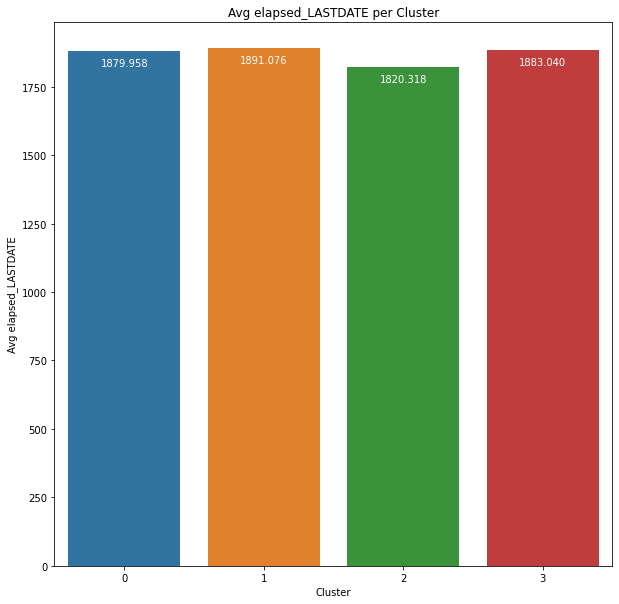

In [21]:
Contvariables = [ 'SOLP3', 'SOLIH', 'AGE', 'INCOME', 'WEALTH1', 'WWIIVETS', 'FEDGOV', 'WEALTH2',
               'CARDPROM', 'CARDPM12', 'NUMPRM12', 'NGIFTALL', 
               'elapsed_MINRDATE', 'elapsed_MAXRDATE', 'elapsed_LASTDATE'
            ]

for i, var in enumerate(Contvariables):
    fig = plt.figure(figsize=(10, 10))
    avg_tmp = pd.DataFrame(df_profilling.groupby('Cluster')[var].mean()).reset_index()


    graph = sns.barplot(x="Cluster", y=var, data=avg_tmp)

    graph.set_xlabel("Cluster")
    graph.set_ylabel(f"Avg {var}")
    graph.set_title(f"Avg {var} per Cluster")

    # place the value of each category in it's respective bar
    for bar in graph.patches:
        graph.annotate("{:.3f}".format(bar.get_height()), 
                       (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, -12),
                       color="white",
                       textcoords = 'offset points')

# Specific Analysis

Text(0.5, 1.0, 'Avg INCOME per Gender per Cluster')

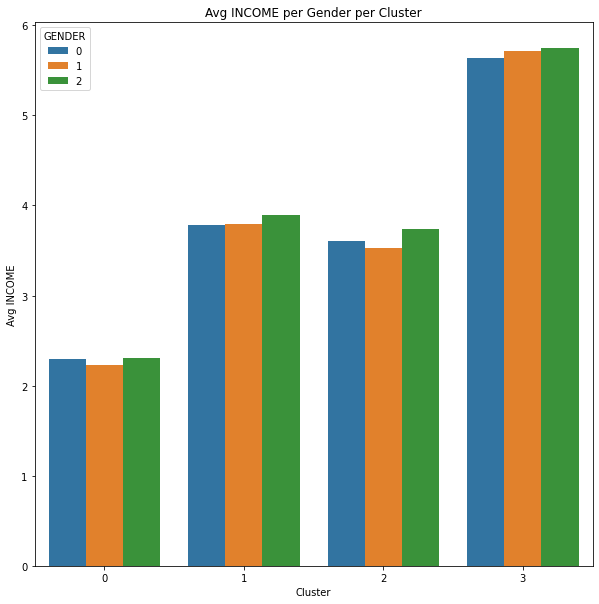

In [22]:
fig = plt.figure(figsize=(10, 10))
avg_tmp = pd.DataFrame(df_profilling.groupby(['Cluster','GENDER'])['INCOME'].mean()).reset_index()


graph = sns.barplot(x="Cluster", y='INCOME', hue="GENDER", data=avg_tmp)

graph.set_xlabel("Cluster")
graph.set_ylabel(f"Avg INCOME")
graph.set_title(f"Avg INCOME per Gender per Cluster")

In [23]:
avg_tmp

,Cluster,GENDER,INCOME
0,0,0,2.294466
1,0,1,2.224187
2,0,2,2.305731
3,1,0,3.780320
4,1,1,3.792316
5,1,2,3.890180
6,2,0,3.606557
7,2,1,3.529269
8,2,2,3.734944
9,3,0,5.633401


In [27]:
df_profilling

,STATE,ZIP,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,HOMEOWNR,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,VETERANS,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,RFA_2F,AGE,elapsed_MAXADATE,elapsed_MINRDATE,elapsed_MAXRDATE,elapsed_LASTDATE,elapsed_FISTDATE,elapsed_NEXTDATE,URBANICITY,SOCIOECON,LASTGIFTAMOUNTCATEGORY,MDONOR_GIVING_RECENCY,MDONOR_GIVING_FREQUENCY,MDONOR_GIVING_AMOUNT,Cluster
0,IL,61081,0,1,0,0,0,0,1,NaN,NaN,1,NaN,0,0,0,39,34,18,10,2,1,12,12,0,5.0,0,1,1,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4.0,7.741935,4,63.0,1429,3074,2525,1857,4078.0,3958.0,2,3,5,0,0,0,2
1,CA,91326,0,1,0,0,0,0,0,1.0,6.0,2,9.0,16,3,0,15,55,11,6,2,1,12,12,0,9.0,2,1,0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18.0,15.666667,2,48.0,1429,2648,1857,1857,2648.0,2101.0,3,1,7,0,0,0,3
2,NC,27017,0,1,0,0,0,0,1,NaN,3.0,2,1.0,2,3,0,20,29,33,6,8,1,12,12,0,1.0,0,1,1,7001,2040

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
# Preparing the data
X = df_fullLabeled.drop(columns=['Cluster','STATE'])
y = df_fullLabeled.Cluster

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 78.78% of the customers correctly


In [25]:
# Assessing feature importance
pd.DataFrame(dt.feature_importances_, index=X_train.columns)

,0
INCOME,0.207806
WEALTH1,0.251851
WWIIVETS,0.000000
FEDGOV,0.000000
WEALTH2,0.000000
CARDPROM,0.000000
CARDPM12,0.000000
NUMPRM12,0.000000
NGIFTALL,0.000000
RFA_2F,0.516593


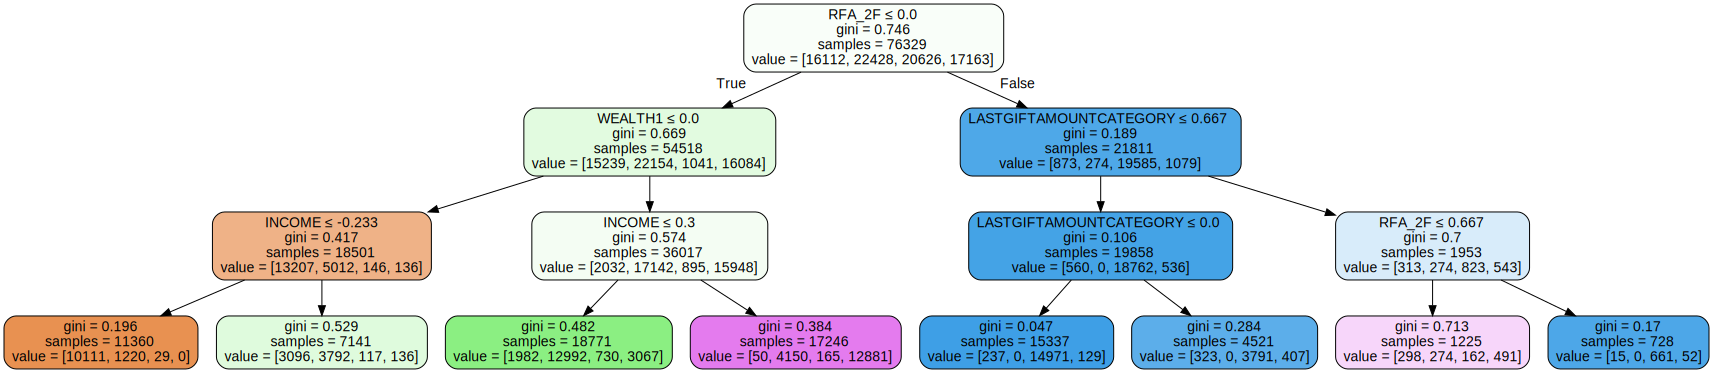

In [26]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)